In [1]:
!pip install -q rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.4 MB/s eta 0:00:00


In [42]:
# Bibliotecas
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_image
from tqdm import tqdm

In [3]:
# Lendo imagem
with rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif') as src:
    img = reshape_as_image(src.read())

In [79]:
# ISODATA function
def isodata(image, k, max_iters=10, min_distance=1e-4):
    # Flatten the image
    data = image.reshape(-1, image.shape[-1])
    data = data.astype(np.float32)

    # Initialize centroids randomly
    centroids_indices = np.random.choice(len(data), size=k, replace=False)
    centroids = data[centroids_indices]

    # Initialize clusters
    clusters = np.zeros(len(data))

    # Initialize cluster sizes
    sizes = np.zeros(k)

    # Initialize iteration counter
    iters = 0

    # Main loop with progress bar
    with tqdm(total=max_iters) as pbar:
        while iters < max_iters:
            # Assign pixels to clusters
            for i in range(len(data)):
                distances = np.linalg.norm(data[i] - centroids, axis=1)
                cluster = np.argmin(distances)
                if clusters[i] != cluster:
                    sizes[int(clusters[i])] -= 1
                    sizes[cluster] += 1
                    clusters[i] = cluster

            # Compute new centroids
            new_centroids = np.zeros((k, data.shape[1]))
            for i in range(len(data)):
                cluster = int(clusters[i])
                new_centroids[cluster] += data[i]
            for j in range(k):
                if sizes[j] > 0:
                    new_centroids[j] /= sizes[j]

            # Check for convergence
            if np.linalg.norm(new_centroids - centroids) < min_distance:
                break

            # Update centroids
            centroids = new_centroids.copy()

            iters += 1
            pbar.update(1)

    # Reshape clusters to image shape
    clustered_image = clusters.reshape(image.shape[:-1])

    return clustered_image

In [92]:
# Run
clusters = isodata(img, 10)

100%|██████████| 10/10 [04:32<00:00, 27.29s/it]


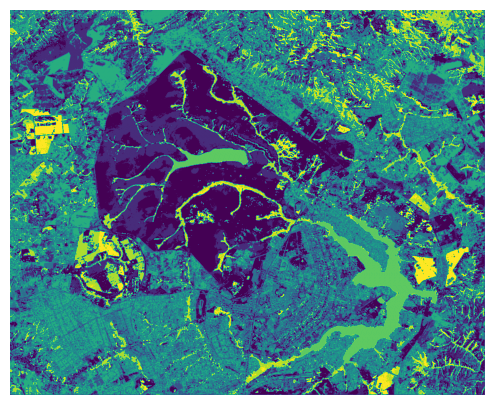

In [93]:
# Result
plt.figure(figsize=(10, 5))
plt.imshow(clusters)
plt.axis('off')
plt.show()